In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time as Time
import os
import json

from ssfmPack import ssfm, utils

# Function Initialization

In [2]:
ssfmFunc = ssfm.ssfm()

In [3]:
def sechPulse(time, amplitude, pulse_width):
    return amplitude/np.cosh(time/pulse_width)

def charLength(pulsewidth, beta2):
    return np.pi/2*pulsewidth**2/np.abs(beta2)

def initPulse(time, pulsewidth, beta2, gamma):
    A = np.sqrt(np.abs(beta2)/gamma/pulsewidth**2)
    return sechPulse(time, A, pulsewidth)

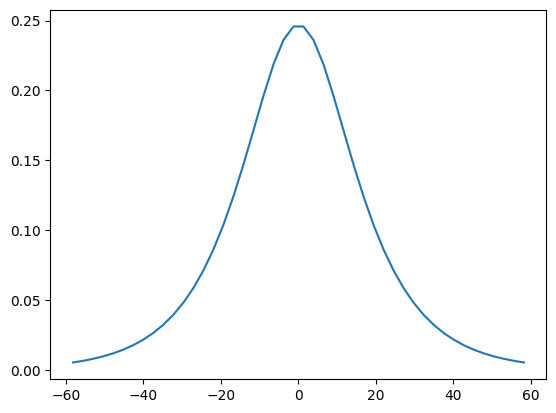

In [4]:
pulsewidth = 2**7*0.1e-12

#fiberparam
gamma = 10e-3 #Nonlinearity parameter in W/m
beta2 = -100e3 #Dispersion in fs^2/m
beta2 *= (1e-30) #Convert fs^2 into s^2
alpha = 0.2e-3*np.log(10)/10 #Power attenuation coef in Nepers/m

timeArr = np.linspace(-10*pulsewidth, 10*pulsewidth, 100) 
pulse = initPulse(timeArr, pulsewidth, beta2, gamma)

ssfmrange = (timeArr*1e12 >= -60) & (timeArr*1e12 <= 60) 
indices = np.where(ssfmrange)[0]
tS = timeArr[indices]*1e12 

plt.plot(tS, pulse[indices])

In [5]:
def runProgs(model_name, timesteps, zsteps, multiplier):
    path = 'result/ssfm/report.json'
    #timespace grid param
    pulsewidth = 2**7*0.1e-12
    
    #fiberparam
    gamma = 10e-3 #Nonlinearity parameter in W/m
    beta2 = -100e3 #Dispersion in fs^2/m
    beta2 *= (1e-30) #Convert fs^2 into s^2
    alpha = 0.2e-3*np.log(10)/10 #Power attenuation coef in Nepers/m
    
    #timespace array
    length = multiplier*charLength(pulsewidth, beta2)
    timeArr = np.linspace(-10*pulsewidth, 10*pulsewidth, timesteps) 
    lengthArr = np.linspace(0, length, zsteps)
    initial = initPulse(timeArr, pulsewidth, beta2, gamma)
    
    #start SSFM 
    ssfmStart = Time.time()
    pulseMatrix, spectrumMatrix = ssfmFunc.SSFM(timeArr, lengthArr, initial,
                                               alpha, beta2, gamma)
    ssfmStop = Time.time() 
    
    print(f'SSFM Prosedure completed for {model_name} for {ssfmStop-ssfmStart:.3f} seconds')
    print('Proceed on Visualization and Recording Data')
    
    #Clip values 
    ssfmrange = (timeArr*1e12 >= -60) & (timeArr*1e12 <= 60) 
    indices = np.where(ssfmrange)[0]

    tS = timeArr*1e12 
    zS = lengthArr/1000 
    pulse = pulseMatrix
    
    T_matrices, Z_matrices = np.meshgrid(tS, zS) 
    imgpath = f'result/ssfm/{model_name}.png' 
    utils.plotPulseContour(Z_matrices, T_matrices, pulse, imgpath) 
    
    data = {
            'runtime' : f'{ssfmStop-ssfmStart:.2f}',
            'timesteps': f'{timesteps}',
            'zteps': f'{zsteps}',
            'prop_length': f'{length:.2f}',
            'clipped_dim': f'{pulse.shape}',
            'error': f'{ssfmFunc.spectrumError:.4e}',

    }

    utils.updateJSON(model_name, data, path)
    return pulse

# SSFM (1):

SSFM Prosedure completed for SSFM5-1 for 0.919 seconds
Proceed on Visualization and Recording Data
Data Updated!


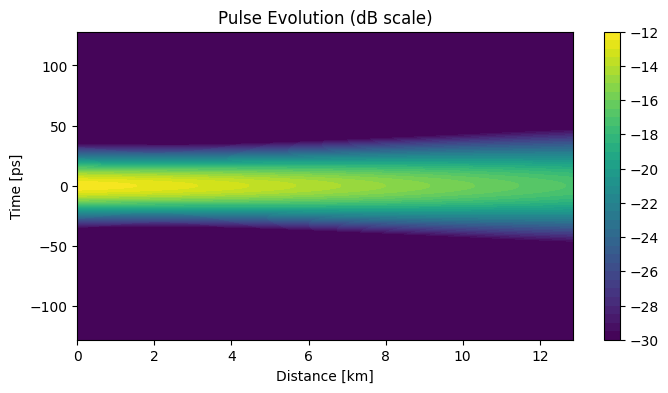

In [6]:
timesteps = 2**9
zsteps = 2**12
multiplier = 5

pulse = runProgs('SSFM5-1', timesteps, zsteps, multiplier)

# SSFM (2)

SSFM Prosedure completed for SSFM20-1 for 1.167 seconds
Proceed on Visualization and Recording Data
Data Updated!


array([[2.24323724e-05+0.00000000e+00j, 2.28752480e-05+0.00000000e+00j,
        2.33268672e-05+0.00000000e+00j, ...,
        2.33268672e-05+0.00000000e+00j, 2.28752480e-05+0.00000000e+00j,
        2.24323724e-05+0.00000000e+00j],
       [2.33124262e-05+1.17637473e-06j, 2.33766859e-05+1.12283773e-06j,
        2.35078115e-05+1.01859851e-06j, ...,
        2.35078115e-05+1.01859851e-06j, 2.33766859e-05+1.12283773e-06j,
        2.33124262e-05+1.17637473e-06j],
       [2.37518254e-05+1.72343057e-06j, 2.37997939e-05+1.68568098e-06j,
        2.38966874e-05+1.61115347e-06j, ...,
        2.38966874e-05+1.61115347e-06j, 2.37997939e-05+1.68568098e-06j,
        2.37518254e-05+1.72343057e-06j],
       ...,
       [7.53032495e-03-2.19273631e-02j, 7.52898532e-03-2.19264605e-02j,
        7.52630555e-03-2.19246533e-02j, ...,
        7.52630555e-03-2.19246533e-02j, 7.52898532e-03-2.19264605e-02j,
        7.53032495e-03-2.19273631e-02j],
       [7.52050507e-03-2.19339216e-02j, 7.51916616e-03-2.19330138e-0

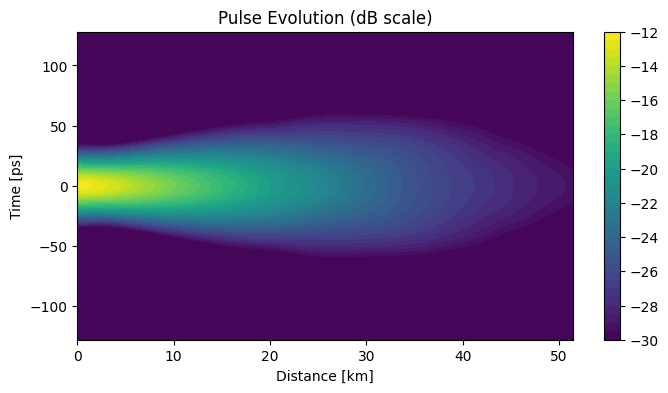

In [7]:
timesteps = 2**10
zsteps = 2**12
multiplier = 20

runProgs('SSFM20-1', timesteps, zsteps, multiplier)